# Styling Plotly Line Charts

### Introduction

In this lesson we'll move onto styling plotly line charts.  Let's get started.

### Loading our data

For this reading let's use the financial data, and we can get stock data by using the pandas data reader.

In [ ]:
!pip install pandas-datareader

In [57]:
# !pip install yfinance

And then we can import the data. 

In [58]:
import datetime
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

start = datetime.datetime(2006,1,1).strftime('%Y-%m-%d')
end = datetime.datetime(2009,1,1).strftime('%Y-%m-%d')

banks = ["BAC", "C", "GS", "JPM", "MS", "WFC"]
bank_dfs = [pdr.get_data_yahoo(bank, start=start, end=end) for bank in banks]
bank_stocks = dict(zip(banks, bank_dfs))    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Let's take a look at an individual stock -- say the price of citigroup.

In [62]:
citigroup_stock = bank_stocks['C']
citigroup_stock[:3]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,490.000000,493.799988,481.100006,492.899994,346.774261,1537600
2006-01-04,488.600006,491.000000,483.500000,483.799988,340.372009,1870960
2006-01-05,484.399994,487.799988,484.000000,486.200012,342.060608,1143160


### Plotting the data

Now, let's plot the opening stock price of Citigroup each day -- and we'll focus on the period between 2004 and 2007.

In [74]:
selected_citigroup = citigroup_stock['12-27-2006':'1-31-2007']

And then let's plot the data.

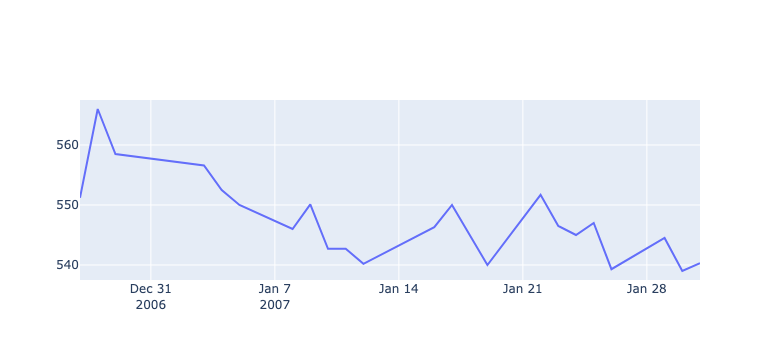

In [78]:
selected_date = selected_citigroup.index
selected_open_price = selected_citigroup['Open']
go.Figure(data = [go.Scatter(x = selected_date, y = selected_open_price)])
# citigroup_stock.index

Now it may be tempting to draw conclusions just from plotting the data -- but one thing to be very careful of is the range of our axis -- especially the y axis.  For example, if you look at the actual change in stock price -- it looks to just be bouncing between 540 and 565.

So is the change significant?  To assess the change -- you can look at the standard deviation.

> The standard deviation measures the average deviation from the average.

Just eyeballing the data abovem it looks like average deviation is (+-10) for an average price of 550.

> And we can use pandas to find out for sure.

In [82]:
citigroup_stock['12-27-2006':'1-31-2007']['Open'].describe()

count     23.000000
mean     547.439129
std        6.724968
min      539.000000
25%      542.700012
50%      546.299988
75%      550.649994
max      566.000000
Name: Open, dtype: float64

So it doesn't look like too much of a change.  Ok, so let's update the axes -- remember we can look at the Yaxis object to get a sense of how we can do this.

In [69]:
go.layout.YAxis()

layout.YAxis()

Ok, now let's set the starting range at 0.

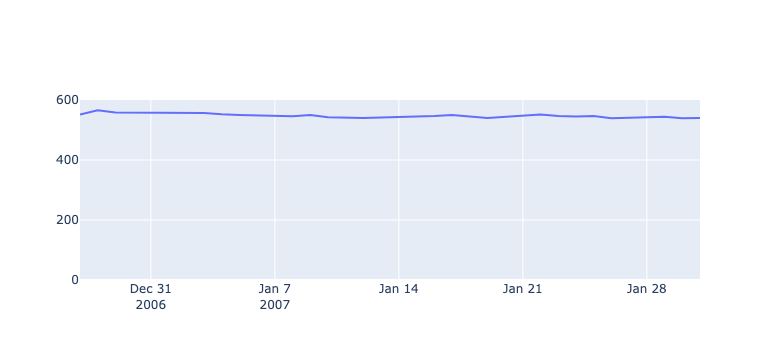

In [87]:
layout = go.Layout(yaxis = {'range': [0, 600]})
selected_date = selected_citigroup.index
selected_open_price = selected_citigroup['Open']
go.Figure(data = [go.Scatter(x = selected_date, y = selected_open_price)], layout = layout)

Quite a different conclusion.

### Breaking out the data

Ok, so now that we know to pay attention to our axes -- let's see some of the other styling tops for plotly.

To start let's plot all of our stocks.

In [88]:
go.Scatter()

Scatter()

In [90]:
scatters = []
for bank_name, stock_df in bank_stocks.items():
    scatter = go.Scatter(x = stock_df.index, y = stock_df['Open'],
                         name = bank_name)
    scatters.append(scatter)

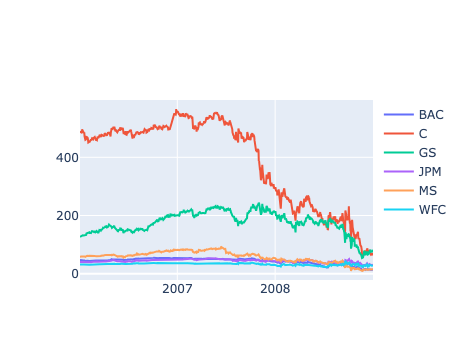

In [91]:
go.Figure(data = scatters)

As we can see, the decline of citigroup really dominates our chart.  And towards the bottom, we see traces leading to a sort of spaghetti chart. 

So one option is simply to create subcharts of the data.

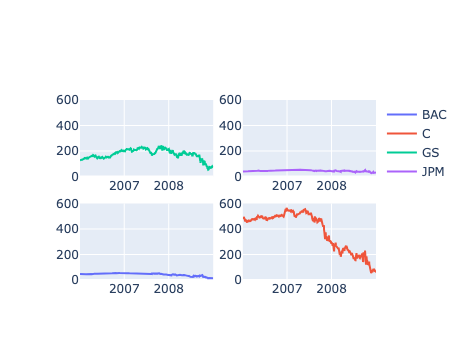

In [116]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(cols=2, rows = 2, start_cell="bottom-left")
fig.add_trace(scatters[0], col = 1, row = 1)
fig.add_trace(scatters[1], col = 2, row = 1)
fig.add_trace(scatters[2], col = 1, row = 2)
fig.add_trace(scatters[3], col = 2, row = 2)

# And if we want to keep the ranges consistent,
# update the following
# fig.update_layout(yaxis1 = dict(range=[0, 600]),
#                   yaxis2 = dict(range=[0, 600]),
#                   yaxis3 = dict(range=[0, 600]),
#                   yaxis4 = dict(range=[0, 600]))

> Another thing we may want to do is change the scale of the data.  For example, what we really may care about is the percentage deviation from for each stock.  So perhaps we should calculate and then plot this.

### Annotating our scatter chart

As for annotating our scatter chart, essentially, we can do this by adding some text to the chart -- or we can also highlight a specific period.

Below we do so, through a couple of different techniques:
    
1. We highlight a range of time through an `vrect`
2. We highlight a specific datapoint, by adding a new single point trace
3. We show how to specify a baseline, with a `hline`

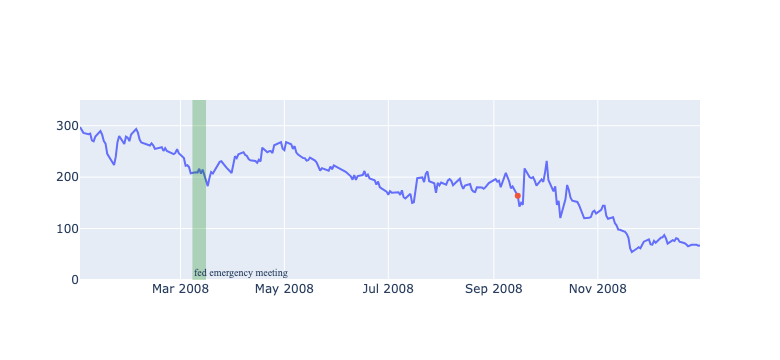

In [177]:
citigroup_stock = bank_stocks['C']["2008-01-01":"2008-12-31"]

fig = go.Figure(data = [
    go.Scatter(x = citigroup_stock.index,
               y = citigroup_stock['Open'], name = 'Citibank Stock')
], layout = go.Layout(showlegend = False, yaxis = {'range': [0, 350]}))


# 1. Highlight date range
fig.add_vrect(x0="2008-03-08", x1="2008-03-16", 
              annotation_text="fed emergency meeting", 
              annotation_position="bottom left",
              annotation=dict(font_size=10, font_family="Times New Roman"),
              fillcolor="green", opacity=0.25, line_width=0)

# 2. Highlight specific point
fig.add_traces(go.Scatter(x=["2008-09-15"], y=[163.9],
                   text = "Lehman collapses"))
# 3. Specify baseline of initial price
# fig.add_hline(y=300, line_dash="dot",
#               annotation_text="Jan 1, 2008 baseline", 
#               annotation_position="bottom right")


# 4. Just add text around the time of collapse
# fig.add_annotation(x="2008-09-15", y= 120, showarrow = False, 
#                    text = "Lehman collapses",
#                    font_size=9)

### Summary

In this lesson, we moved through different considerations when plotting a line chart.  Remember, that line charts are used to show comparisons through time.  

The first consideration was to be careful of axes.  We saw that our axis range can really affect how we view a change in our data.  But really, we should pay attention to the standard deviation, and see if that movement in the data is significant.  (Eg. You could look at the standard deviation divided by the average).

And we can correct for this by specifying the range in the axis.

In [181]:
layout = go.Layout(yaxis = {'range': [0, 600]})

We saw how we can handle our spaghetti plot, by breaking out our data into multiple subplots.  

In [180]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(cols=2, rows = 2, start_cell="bottom-left")
fig.add_trace(scatters[0], col = 1, row = 1)
fig.add_trace(scatters[1], col = 2, row = 1)
fig.add_trace(scatters[2], col = 1, row = 2)
fig.add_trace(scatters[3], col = 2, row = 2)

pass

And then we saw how different ways to annotate our scatter plot, whether by:

* Highlighting a specific region with a vrect.

In [ ]:
fig.add_vrect(x0="2008-03-08", x1="2008-03-16", 
              annotation_text="fed emergency meeting")

* Highlighting a specific point, by adding a single point scatter trace 

In [ ]:
fig.add_traces(go.Scatter(x=["2008-09-15"], y=[163.9],
                   text = "Lehman collapses"))

* Adding a baseline with an hline

In [ ]:
fig.add_hline(y=300, line_dash="dot",
              annotation_text="Jan 1, 2008 baseline", 
              annotation_position="bottom right")

Or adding some text with an annotation

In [ ]:
fig.add_annotation(x="2008-09-15", y= 120, showarrow = False, 
                   text = "Lehman collapses",
                   font_size=9)

### Resources

[Kaggle Financial Crisis](https://www.kaggle.com/code/tomasmantero/eda-of-stock-prices-financial-crisis#3.-Data)


[Subplots](https://plotly.com/python/subplots/)

[Shapes](https://plotly.com/python/shapes/)

[Horizontal and Vertical Shapes](https://plotly.com/python/horizontal-vertical-shapes/)

[Annotate specific text Stackoverflow](https://stackoverflow.com/questions/68249957/how-to-annotate-a-specific-data-point-on-plotly-interactively)

[Facet Cols](https://plotly.github.io/plotly.py-docs/generated/plotly.figure_factory.create_facet_grid.html)